# Predicting the Stock Market Prices

### **Data Description:** 

In this mission, we'll be working with a csv file containing index prices. Each row in the file contains a **daily record of the price of the S&P500 Index from 1950 to 2015**. The dataset is stored in sphist.csv.

The columns of the dataset are:

    Date -- The date of the record.
    Open -- The opening price of the day (when trading starts).
    High -- The highest trade price during the day.
    Low -- The lowest trade price during the day.
    Close -- The closing price for the day (when trading is finished).
    Volume -- The number of shares traded.
    Adj Close -- The daily closing price, adjusted for corporate actions.

**We'll be using this dataset to develop a predictive model. We'll train the model with data from 1950-2012, and try to make predictions from 2013-2015.**

In [69]:
import pandas as pd
from datetime import datetime

# Read the s&p 500 input data set and sorting based on date.
sp500 = pd.read_csv("sphist.csv", index_col=False)
sp500["Date"] = pd.to_datetime(sp500["Date"])
sp_sorted = sp500.sort_values("Date")

# To do feature engineering - take mean of previous 5
temps = pd.DataFrame(sp_sorted.Close)

# need to shift by 1 coz otherwise it will add up present value also
# Adding present value to the mean is same as giving the 
# predicted value (outcome)along with the training data.
# This will hurt prediction model
shifted = temps.shift(1)

# The average price for the past 365 days.
# The standard deviation of the price over the past 365 days
window = shifted.rolling(window=365)
means_365 = window.mean()
std_365 = window.std()
sp_sorted['mean_365'] = means_365
sp_sorted['std_365'] = std_365

# The ratio between the average price 
# for the past 5 days, and the average 
# price for the past 365 days.
window = shifted.rolling(window=5)
means_5 = window.mean()
sp_sorted['mean_5by365'] = means_5/ means_365

# Some of the indicators use 365 days of historical data, and the dataset starts 
# on 1950-01-03. Thus, any rows that fall before 1951-01-03 don't have enough 
# historical data to compute all the indicators. 
sp_augmented = sp_sorted[sp_sorted["Date"] > datetime(year=1951, month=1, day=2)]

# Use the dropna method to remove any rows with NaN values. 
# Pass in the axis=0 argument to drop rows.
sp_augmented = sp_augmented.dropna(axis = 0)

print("\n\n*** Dataset After Augmented Values ***")
print(sp_augmented.head(5))

# Train dataset would contain rows with a date less than 2013-01-01
train = sp_augmented[sp_augmented["Date"] < datetime(year=2013, month=1, day=1)]
test = sp_augmented[sp_augmented["Date"] >= datetime(year=2013, month=1, day=1)]

# Separate Train dataset 
y_train = train['Close']
x_train = train.drop(
    ['Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'], axis=1)

# Separate Test dataset 
y_test = test['Close']
x_test = test.drop(
    ['Close', 'High', 'Low', 'Open', 'Volume', 'Adj Close', 'Date'], axis=1)


print("\n\n*** Train Dataset Outcome Variables ***")
print(y_train.head(10))
print("\n\n*** Train Dataset Input Variables ***")
print(x_train.head(10))




*** Dataset After Augmented Values ***
            Date       Open       High        Low      Close     Volume  \
16224 1951-06-19  22.020000  22.020000  22.020000  22.020000  1100000.0   
16223 1951-06-20  21.910000  21.910000  21.910000  21.910000  1120000.0   
16222 1951-06-21  21.780001  21.780001  21.780001  21.780001  1100000.0   
16221 1951-06-22  21.549999  21.549999  21.549999  21.549999  1340000.0   
16220 1951-06-25  21.290001  21.290001  21.290001  21.290001  2440000.0   

       Adj Close   mean_365   std_365  mean_5by365  
16224  22.020000  19.447726  1.790253     1.120954  
16223  21.910000  19.462411  1.789307     1.125246  
16222  21.780001  19.476274  1.788613     1.128142  
16221  21.549999  19.489562  1.787659     1.126757  
16220  21.290001  19.502082  1.786038     1.121008  


*** Train Dataset Outcome Variables ***
16224    22.020000
16223    21.910000
16222    21.780001
16221    21.549999
16220    21.290001
16219    21.299999
16218    21.370001
16217    21.100

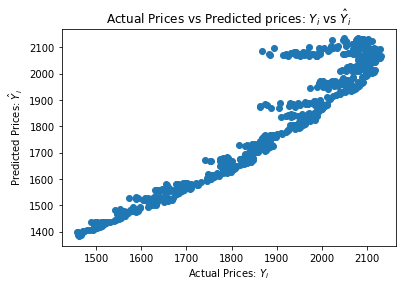

Mean Absolute Error (MAE) = 98.94921147104225


In [70]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math 
# Importing the statistics module
from statistics import mean

lm = LinearRegression()
lm.fit(x_train, y_train)

y_pred = lm.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Actual Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

# Calculating the error
delta_y = y_test - y_pred;
print("Mean Absolute Error (MAE) = " + str(mean(abs(delta_y))))

# Conclusion

**The Actual and Predicted prices are almost linear. Hence the predictin model is working**, though the error can be further reduced with a better model such as randomforest or using feature engineering techniques to include volume of transaction.